<a href="https://colab.research.google.com/github/CrMessiProgrammer/machine_learning-projetinho-python/blob/main/Projeto_NP2_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NOME: CARLOS HENRIQUE NUNES RA: N4504H6**

**# PROJETO NP2 - INTELIGÊNCIA ARTIFICIAL**

**OBJETIVO:** Analisar dados, contendo 3 colunas com informações sobre um site freelance (ficticio) em relação a preço, horas estimadas e se não conclusão ou conclusão do mesmo. O objetivo do projeto é analisar se um projeto (conhecendo o seu valor e horas estimadas) se o mesmo será concluido ou não.

# Base de Dados

In [156]:
# IMPORTAÇÃO DA BASE DE DADOS

# importar o módulo para extração do CSV
import pandas as pd

# Definir a URL
URL = "https://raw.githubusercontent.com/profviniciusheltai/Aula_IA/main/Projeto03.csv"

# Executar a importação do CSV (via URL) para uma variável chamada "dados"
dados = pd.read_csv(URL)

# Imprime os 5 primeiros itens para confirmação
dados.head()

# Imprime os 5 últimos itens para confirmação
dados.tail()

,unfinished,expected_hours,price
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324
2156,1,37,377


In [157]:
# EDITAR INFORMAÇÕES DA BASE DADOS - TRADUÇÃO DO CABEÇARIO


# Tradução dos títulos das colunas
a_renomear = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

# Atribuição do dicionário de tradução na base de dados
dados = dados.rename(columns = a_renomear)

# Apresentação da base confirmando o resultado (já modificado)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [158]:
# EDITAR INFORMAÇÕES DA BASE DADOS - TROCAR "NÃO FINALIZADOS" POR "FINALIZADOS"

# Criação do dicionario de substituição da logica
troca = {
    0 : 1,
    1 : 0
}

# Aplicar o troca, criando uma nova coluna com a substituição
dados['finalizado'] = dados.nao_finalizado.map(troca)

# Imprime os 5 primeiros itens para confirmação
dados.head()

# Imprime os 5 ultimos itens para confirmação
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [159]:
# Trocar o valor do preço de Dolar para Real
dados['preco_real'] = dados.preco * 5.10

# Trocar o valor das horas esperadas para minutos esperados
dados['minutos_esperados'] = dados.horas_esperadas * 60

# Imprime os 5 primeiros itens para confirmação
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado,preco_real,minutos_esperados
0,1,26,192,0,979.2,1560
1,1,88,9015,0,45976.5,5280
2,1,89,2577,0,13142.7,5340
3,1,42,275,0,1402.5,2520
4,1,39,170,0,867.0,2340


<Axes: xlabel='horas_esperadas', ylabel='preco_real'>

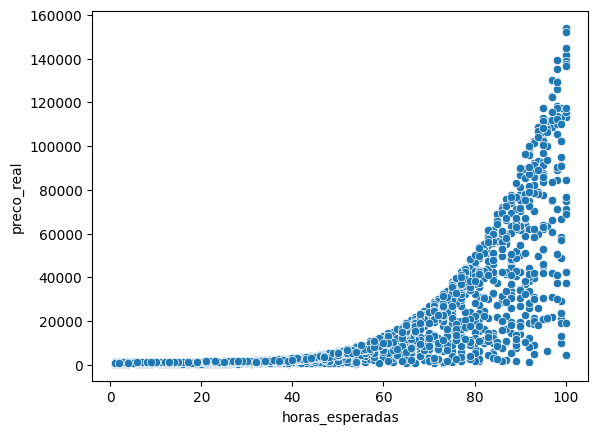

In [160]:
# APRESENTAÇÃO DOS DADOS OBTIDOS DE FORMA GRAFICA 01

# Importação do modulo grafico - seaborn e modelo sns
import seaborn as sns

# Aplicação do método para plotagem grafica - Grafico de Dispersão
sns.scatterplot(x="horas_esperadas", y="preco_real", data=dados)

# Imprime de forma "limpa", apenas os dados x e y da base dados sem detalhamento

<Axes: xlabel='horas_esperadas', ylabel='preco_real'>

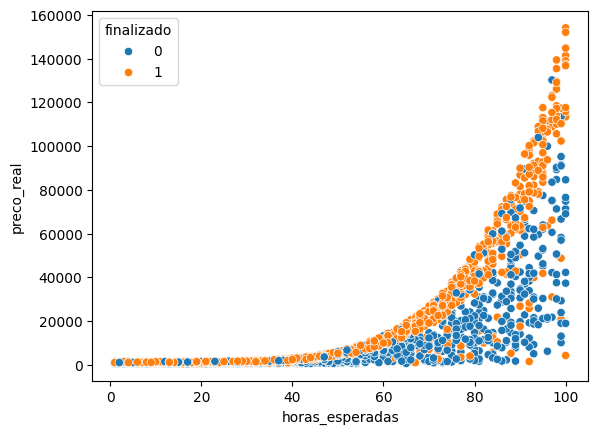

In [161]:
# APRESENTAÇÃO DOS DADOS OBTIDOS DE FORMA GRAFICA 02

# Aplicação do método para plotagem grafica - Grafico de Dispersão com diferença de cor em relação a "finalizado"
sns.scatterplot(x="horas_esperadas", y="preco_real", hue="finalizado", data=dados)

# Imprime de forma "limpa", apenas os dados x e y da base dados com distinção de "finalizados" e "não finalizados"

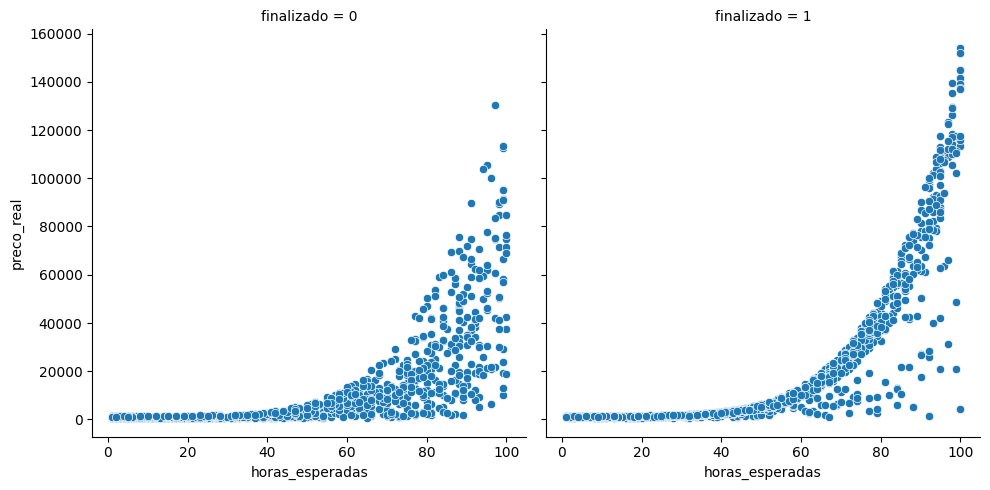

In [162]:
# APRESENTAÇÃO DOS DADOS OBTIDOS DE FORMA GRAFICA 03

# Aplicação do método para plotagem grafica - Grafico de Relação separando em "finalizado" e "não finalizado"
sns.relplot(x="horas_esperadas", y="preco_real", col="finalizado", data=dados)

# Imprime dois graficos separando o que foi finalizado e o que não foi finalizado

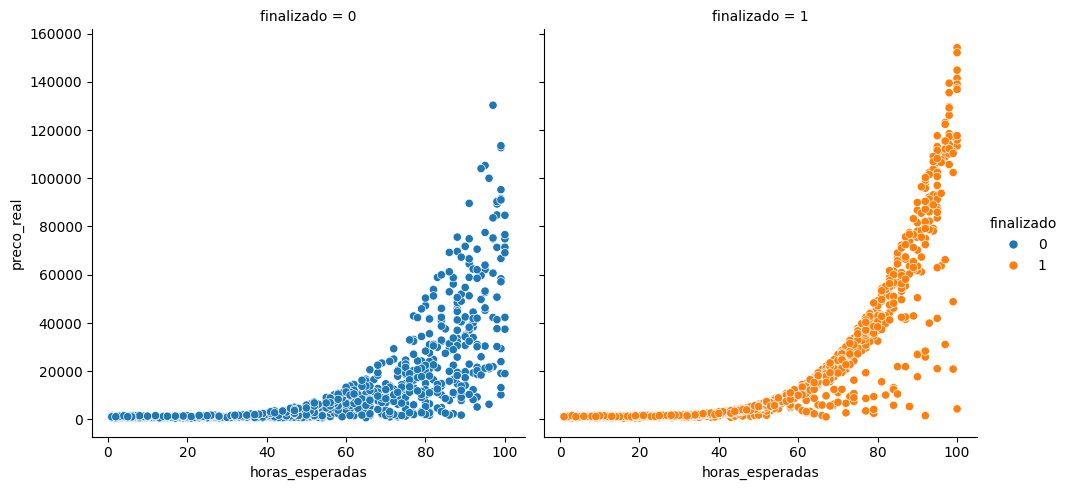

In [163]:
# APRESENTAÇÃO DOS DADOS OBTIDOS DE FORMA GRAFICA 04

# Aplicação do método para plotagem grafica - Grafico de Relação separando em "finalizado" e "não finalizado" com diferença de tons
sns.relplot(x="horas_esperadas", y="preco_real", col="finalizado", hue="finalizado", data=dados)

# Imprime dois graficos separando o que foi finalizado e o que não foi finalizado com diferença de tons

In [164]:
# DEFINIR MINHAS BASES DE DADOS DE TREINO E TESTE

# Definição e atribuindo o que é x (caracteristica) e y (resultado analisado)
x = dados[["horas_esperadas", "preco_real"]]
y = dados["finalizado"]

# Importação do sklearn - train_test_split
from sklearn.model_selection import train_test_split

# Implemento o metodo test_train_split com bases de 70% treino e 30% teste
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.30,
                                                        stratify = y)

# Apresentação da proporção de teste e treino
print(f"Treino: {len(treino_y)} - Teste: {len(teste_y)}")

print(f"Relação Teste: {len(teste_y)/(len(treino_y)+len(teste_y))*100 :.2f} %")

print(f"Relação Treino: {len(treino_y)/(len(treino_y)+len(teste_y))*100 :.2f} %")

Treino: 1509 - Teste: 648
Relação Teste: 30.04 %
Relação Treino: 69.96 %


# Treinamento

In [165]:
# # REALIZA O TREINAMENTO COM A BASE DE TREINAMENTO NO ESTIMADOR
################################################################################

# Definição e Importação do estimador
from sklearn.svm import LinearSVC

# Defino o estimador (no caso LinearSVC)
modelo = LinearSVC()

# Aplico o treinamento
modelo.fit(treino_x, treino_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# Teste

In [166]:
# REALIZA O TESTE A FIM DE CONFIRMAR SE O MEU ESTIMADOR APRENDEU CORRETAMENTE

# Definição a previsões com a base de teste de x
previsoes = modelo.predict(teste_x)

# Apresentação das Previsões (sem necessidade)
print(previsoes)

[0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 

# Acurácia / Precisão

In [167]:
# REALIZA A ACURACIA (PRECISÃO) COM BASE NO TREINAMENTO, TESTE E O "GABARITO" (TESTE_Y)

# Importação do metodo metric / accuracy_score do Sklearn
from sklearn.metrics import accuracy_score

# Aplico o método
acuracia = accuracy_score(teste_y, previsoes)*100

# Apresentação do resultado:
print(f"Acuracia: {acuracia:.2f}%")

Acuracia: 53.70%


# ANÁLISE DO RESULTADO APRESENTADO

A fim de analisar o comportamento dos resultados apresentados, vamos fazer algumas analises desses dados gerados. Esta etapa não é convencional realizar num processo de predição real.

In [168]:
# ANALISE APROFUNDADA DOS MEUS RESULTADOS

# Importar o NumPy
import numpy as np

# Criar uma matriz de previsão com tudo 1 (tudo finalizado nos teste)
previsoes_base = np.ones(648)

# Analise da acuracia com o resultado tudo 1
acuracia_base = accuracy_score(teste_y, previsoes_base)*100

# Apresentação do resultado:
print(f"Acuracia Real: {acuracia:.2f} %")
print(f"Acuracia Base: {acuracia_base:.2f} %")

Acuracia Real: 53.70 %
Acuracia Base: 52.62 %


<Axes: xlabel='horas_esperadas', ylabel='preco_real'>

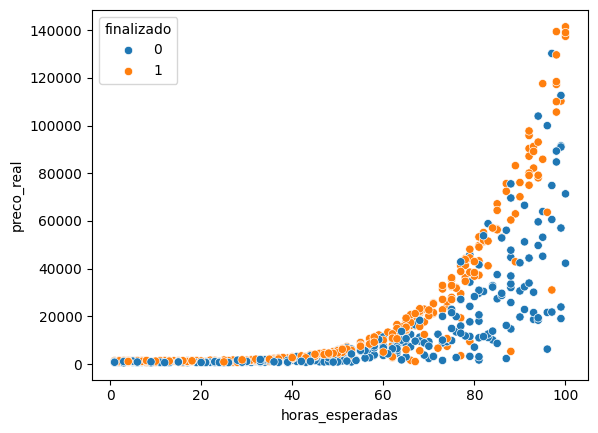

In [169]:
# ANALISE APROFUNDADA DOS MEUS RESULTADOS DE FORMA GRAFICA
################################################################################

# Replotar o grafico da base de dados (teste_x)
sns.scatterplot(x="horas_esperadas", y="preco_real", hue=teste_y, data=teste_x)

In [170]:
# Definir os pontos min e max de X e Y:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco_real.min()
y_max = teste_x.preco_real.max()

# Apresentação dos resultados
print(f"Xmin: {x_min}, Xmax: {x_max}")
print(f"Ymin: {y_min}, YMax: {y_max}")

Xmin: 1, Xmax: 100
Ymin: 515.0999999999999, YMax: 141463.8


In [171]:
# Definir a resolução de pixel (pontos a serem analisados)
pixel = 100

# Calcula um range entre os valores xmin e xmax e ymin e ymax
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixel)

# Juntar os pontos X e Y obtendo uma grade (grid):
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.00000000e+00, 5.15100000e+02],
       [1.99000000e+00, 5.15100000e+02],
       [2.98000000e+00, 5.15100000e+02],
       ...,
       [9.70300000e+01, 1.40054313e+05],
       [9.80200000e+01, 1.40054313e+05],
       [9.90100000e+01, 1.40054313e+05]])

In [172]:
# Realizar uma predição em cada ponto obtido na etapa anterior
Z = modelo.predict(pontos)

# Redimencionar os pontos 100 x 100
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


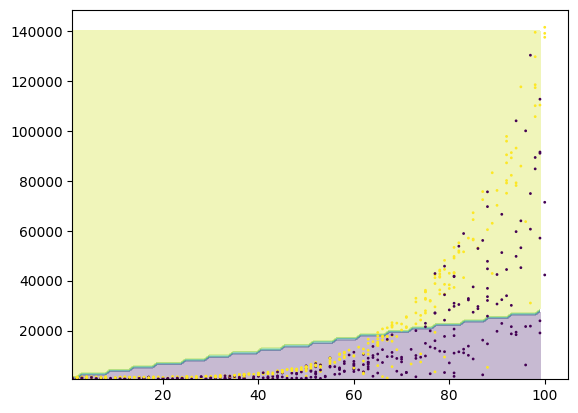

In [173]:
# Realizando a plotagem com matplot e modulo plt
import matplotlib.pyplot as plt

# plotagem Scatter
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco_real, c=teste_y, s=1)

In [174]:
# Apresentação das Previsões (sem necessidade)
print(previsoes)

[0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 